In [ ]:
import os
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread,imsave
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model, load_model, Model
from tensorflow.keras.layers import Input,InputLayer, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from sklearn.metrics import classification_report

In [ ]:
root='AFFINE_REG_SKS_MASK_2D_IMAGES_DIR/'

In [ ]:
def resnet50_row(optimizer, loss, metrics, shape, num_layers_trainable=3):
    # Load the base ResNet50 model without the top layer
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=shape)

    # Freeze all layers except for the last num_layers_trainable layers
    for layer in base_model.layers[:-num_layers_trainable]:
        layer.trainable = False

    # Renaming the trainable layers to avoid naming conflicts
    for layer in base_model.layers[-num_layers_trainable:]:
        layer.trainable = True
        layer._name = layer._name + str('_ft')

    # Add new layers on top of the base model
    y = Flatten()(base_model.output)
    c = Dropout(0.4)(y)
    c = Dense(512, activation='relu')(c)
    c = Dense(256, activation='relu')(c)
    c = Dense(128, activation='relu')(c)
    output_layer = Dense(3, activation='softmax')(c)

    # Create the new model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [ ]:
def plot_confusion_matrix(true_lab,predict_lab,classes,path):
  matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
  ax = plt.subplot()
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(classes)
  ax.yaxis.set_ticklabels(classes)
  plt.savefig(f'{path}confusion_matrix.png')

In [ ]:
def dump_text(text,path):
  text_file = open(path, "w")
  text_file.write(text)
  text_file.close()

In [ ]:
image_Shape=(436,364,3)
training_image_datagen = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
                                                  directory=f'{root}/training/',
                                                  target_size=(image_Shape[0], image_Shape[1]),
                                                  class_mode='categorical',
                                                  batch_size=10
                                                  )

testing_image_datagen = ImageDataGenerator().flow_from_directory(
                                                  directory = f'{root}/testing/' ,
                                                  target_size = (image_Shape[0] ,image_Shape[1]) ,
                                                  class_mode = 'categorical' ,
                                                  batch_size=1 ,
                                                  shuffle = False
                                                  )

Found 11059 images belonging to 3 classes.
Found 494 images belonging to 3 classes.


In [ ]:
EPOCH = 100
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='AD_Precision',class_id=0),
    tf.keras.metrics.Precision(name='CN_Precision',class_id=1),
    tf.keras.metrics.Precision(name='MCI_Precision',class_id=2),
    tf.keras.metrics.Recall(name='AD_Recall',class_id=0),
    tf.keras.metrics.Recall(name='CN_Recall',class_id=1),
    tf.keras.metrics.Recall(name='MCI_Recall',class_id=2),
    ]
LOOS = 'categorical_crossentropy'

2024-04-20 13:22:27.192373: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 13:22:27.934796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9629 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:60:00.0, compute capability: 7.5


Epoch 1/70


2024-04-18 19:47:15.475800: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


1106/1106 [==============================] - 132s 115ms/step - loss: 1.7849 - Accuracy: 0.4269 - AD_Precision: 0.2229 - CN_Precision: 0.3362 - MCI_Precision: 0.5289 - AD_Recall: 0.1430 - CN_Recall: 0.2480 - MCI_Recall: 0.5285 - val_loss: 2.6014 - val_Accuracy: 0.2004 - val_AD_Precision: 0.2025 - val_CN_Precision: 0.0000e+00 - val_MCI_Precision: 0.2000 - val_AD_Recall: 1.0000 - val_CN_Recall: 0.0000e+00 - val_MCI_Recall: 0.0042
Epoch 2/70
1106/1106 [==============================] - 101s 91ms/step - loss: 1.1608 - Accuracy: 0.4617 - AD_Precision: 0.2792 - CN_Precision: 0.3880 - MCI_Precision: 0.5442 - AD_Recall: 0.1157 - CN_Recall: 0.2280 - MCI_Recall: 0.5557 - val_loss: 1.1144 - val_Accuracy: 0.4555 - val_AD_Precision: 0.4118 - val_CN_Precision: 0.0000e+00 - val_MCI_Precision: 0.4869 - val_AD_Recall: 0.0714 - val_CN_Recall: 0.0000e+00 - val_MCI_Recall: 0.6987
Epoch 3/70
1106/1106 [==============================] - 99s 89ms/step - loss: 1.0629 - Accuracy: 0.4985 - AD_Precision: 0.3450 -

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


              precision    recall  f1-score   support

          AD       0.83      0.55      0.66        98
          CN       0.86      0.82      0.84       157
         MCI       0.78      0.91      0.84       239

    accuracy                           0.81       494
   macro avg       0.82      0.76      0.78       494
weighted avg       0.82      0.81      0.81       494



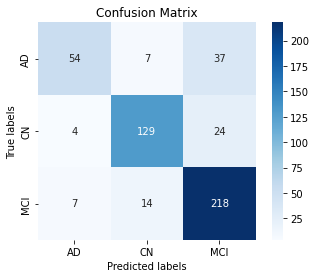

In [ ]:
savepath = 'Augmentation training/Resnet50/resnet50_70_0.0001/'
lr=0.0001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'resnet50_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.RMSprop(learning_rate=lr)
model04 = resnet50_row(OPT, LOOS,METRICS,image_Shape)
history04 = model04.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model04 = resnet50_row(OPT, LOOS,METRICS,image_Shape)
model04.load_weights(glob.glob(f"{savepath}resnet50_row_10E-5_weights-epoch:*-val_Accuracy:{max(history04.history['val_Accuracy']):.4f}.h5")[0])
model04.save(f"{savepath}/Resnet_100_0.0001.h5")
p1 = model04.predict(testing_image_datagen)
predicted_lab = p1.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save(f"{savepath}/resnet_100_0.0001.npy",p1 )

Epoch 1/50


2024-04-19 11:31:03.610862: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


1106/1106 [==============================] - 129s 108ms/step - loss: 1.1261 - Accuracy: 0.4731 - AD_Precision: 0.2500 - CN_Precision: 0.3871 - MCI_Precision: 0.5377 - AD_Recall: 0.0536 - CN_Recall: 0.1795 - MCI_Recall: 0.5838 - val_loss: 1.0054 - val_Accuracy: 0.5000 - val_AD_Precision: 0.3846 - val_CN_Precision: 0.7037 - val_MCI_Precision: 0.5238 - val_AD_Recall: 0.1531 - val_CN_Recall: 0.1210 - val_MCI_Recall: 0.5523
Epoch 2/50
1106/1106 [==============================] - 101s 91ms/step - loss: 1.0129 - Accuracy: 0.5186 - AD_Precision: 0.4015 - CN_Precision: 0.4905 - MCI_Precision: 0.5747 - AD_Recall: 0.0757 - CN_Recall: 0.2339 - MCI_Recall: 0.6108 - val_loss: 1.0226 - val_Accuracy: 0.5425 - val_AD_Precision: 0.5000 - val_CN_Precision: 0.5574 - val_MCI_Precision: 0.5781 - val_AD_Recall: 0.0204 - val_CN_Recall: 0.4331 - val_MCI_Recall: 0.6192
Epoch 3/50
1106/1106 [==============================] - 99s 89ms/step - loss: 0.9558 - Accuracy: 0.5530 - AD_Precision: 0.4668 - CN_Precision: 0

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


              precision    recall  f1-score   support

          AD       0.85      0.62      0.72        98
          CN       0.84      0.89      0.86       157
         MCI       0.82      0.88      0.85       239

    accuracy                           0.83       494
   macro avg       0.84      0.80      0.81       494
weighted avg       0.83      0.83      0.83       494



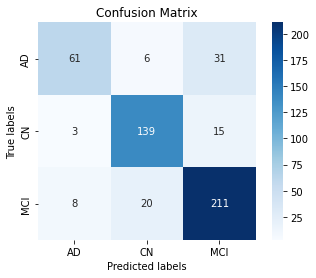

In [ ]:
savepath = 'Augmentation training/Resnet50/Resnet_50_0.00001/'
lr=0.00001
if not os.path.isdir(savepath):
      os.makedirs(savepath)
csvloger_callback = tf.keras.callbacks.CSVLogger(f'{savepath}history.csv', separator=',', append=False)

modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(savepath+'resnet50_row_10E-5_weights-epoch:{epoch:03d}-val_Accuracy:{val_Accuracy:.4f}.h5',monitor='val_Accuracy'
    ,verbose=0,save_best_only=True,save_weights_only=True,mode='max',save_freq='epoch' , initial_value_threshold=0.85)

OPT = tf.keras.optimizers.RMSprop(learning_rate=lr)
model04 = resnet50_row(OPT, LOOS,METRICS,image_Shape)
history04 = model04.fit(training_image_datagen, epochs=EPOCH, validation_data=testing_image_datagen,callbacks=[csvloger_callback,modelcheckpoint_callback])
model04 = resnet50_row(OPT, LOOS,METRICS,image_Shape)
model04.load_weights(glob.glob(f"{savepath}resnet50_row_10E-5_weights-epoch:*-val_Accuracy:{max(history04.history['val_Accuracy']):.4f}.h5")[0])
model04.save(f"{savepath}/Resnet_50_0.00001.h5")
p1 = model04.predict(testing_image_datagen)
predicted_lab = p1.argmax(axis=-1)
true_lab = testing_image_datagen.classes
plot_confusion_matrix(true_lab, predicted_lab, testing_image_datagen.class_indices.keys(),savepath)
report = classification_report(true_lab, predicted_lab, target_names=testing_image_datagen.class_indices.keys())
print(report)
dump_text(report,f'{savepath}classification_report.txt')
np.save(f"{savepath}/resnet_50_0.00001.npy",p1 )